# Working with Tabular Data in Pandas

This notebook will demonstrate basic techniques for loading and manipulating data using the pandas library.



## Check that the data file is in the right place

We will be working with the `example_data.csv` data file. To analyze the data, we need to download it and place it in our current working directory. 

One place where it is easy to have problems is if the data you want to analyze aren't in the same folder where you ran your jupyter notebook. To make sure this isn't the issue, let's first use the `listdir` command to check what files are in our current directory. This command must be imported from the `os` module.

In [1]:
from os import listdir
listdir()

['example_data_no_header.csv',
 'treatment_results (1).csv',
 'scatterplot_example.png',
 'treatment_results.html',
 'working_with_tabular_data_in_pandas.ipynb',
 'treatment_results.csv',
 'is_this_drug_working',
 '.ipynb_checkpoints',
 'example_data.csv']

## Load the data into python using pandas

Pandas is traditionally imported using the alis `pd`. We'll follow this convention so what we practice will be similar to what you read in online tutorials.

In [2]:
# import the pandas under the alias or nickname pd
import pandas as pd

#using the read_csv function from pandas to create a dataframe called df
df = pd.read_csv('example_data.csv')

#If our data didn't have a header we could manually say which column is which:
#df = pd.read_csv('example_data_no_header.csv',header=None,names=["county","income","age"])

#showing the first few rows of the dataframe
df.head()

,county,income,average_age
0,a,55000,43
1,b,24000,34
2,c,16000,31
3,d,100000,45
4,e,34000,33


## Setting an index column

In Pandas, each DataFrame needs an index column that uniquely identifies each row. This is by default just a number (counting from 0), but if you have your own data that is a more meaningful unique indentifier for each row, you can set one column as an 'index' column using the dataframe `set_index` method.

In [3]:
df = df.set_index('county')
df.head()

,income,average_age
county,,
a,55000,43
b,24000,34
c,16000,31
d,100000,45
e,34000,33


## Access a column and assign it to a variable

Square brackets allow you to access columns of pandas DataFrames. These are initially represented as pandas `Series` objects

In [ ]:
income = df['income']
print("Income as a Data Series",income)

They can also be converted into basic python lists.

In [4]:
income = list(income)
print("Income as a list:",income)

Income as a Data Series county
a      55000
b      24000
c      16000
d     100000
e      34000
Name: income, dtype: int64
Income as a list: [55000, 24000, 16000, 100000, 34000]


## Extract lists of x and y data from a pandas DataFrame

Let's practice extracting lists of x and y data, as well as a list of labels. Then, we can combine this extracted data with functions we already know for making scatterplots. Together, these techniques will let us load and plot any tabular scatterplot data. 

In [5]:
y = list(df['income'])
x = list(df['average_age'])
labels = list(df.index)
print(x,y,labels)

[43, 34, 31, 45, 33] [55000, 24000, 16000, 100000, 34000] ['a', 'b', 'c ', 'd', 'e']


## Make a `matplotlib` scatterplot of the data


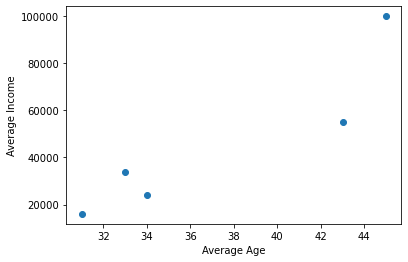

In [6]:
## Make a scatterplot of the data

import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.xlabel("Average Age")
plt.ylabel("Average Income")
plt.savefig('scatterplot_example.png',dpi=300)

## Using a for loop with enumerate to label data points

In some projects, it's important to be able to label scatterplot datapoints. We can do this by using a for loop to iterate over a list of labels. The python `enumerate` function bpth iterates over a list, and returns an i variable that holds which item of the list you are currently on. In this example, `enumerate` gives us both which label we are on (`i`), and what that label is (`label`). 

We can combine that information with matplotlib's `annotate` function, which adds text to your graph at x and y coordinates you specify. Together, these techniques let us add labels to the scatterplot a little offset from each data point.


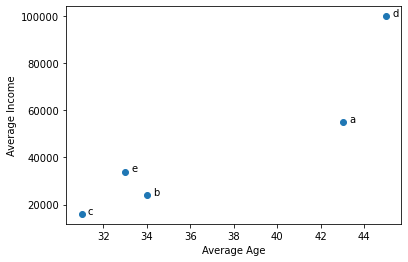

In [65]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.xlabel("Average Age")
plt.ylabel("Average Income")

for i,label in enumerate(labels):
    x_coordinate = x[i]
    y_coordinate = y[i]
    
    #Offset the x coordinate
    offset = 0.3
    x_coordinate += offset
 
    plt.annotate(label,(x_coordinate,y_coordinate))

## Label only certain data points

In some cases, we may only want to label certain points, especially if you have a lot of data and labelling all points would be very messy. If we have a list of the points we want to label, we can add an `if` statement to our loop to only label data points that are in our list.

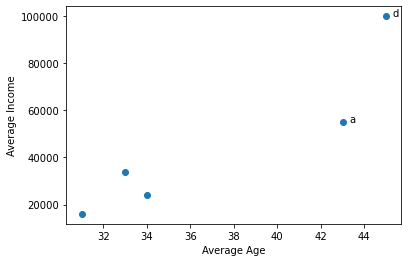

In [66]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.xlabel("Average Age")
plt.ylabel("Average Income")

labels_to_plot = ['a','d']
for i,label in enumerate(labels):
    x_coordinate = x[i]
    y_coordinate = y[i]
    
    #Offset the x coordinate
    offset = 0.3
    x_coordinate += offset
    
    if label in labels_to_plot:
        plt.annotate(label,[x_coordinate,y_coordinate])



plt.savefig('scatterplot_example.png',dpi=300)